# My Side Project 01

6월 21일 수업에서는 아마존 홈페이지에서 원하는 상품의 리뷰 정보를 얻어오는 실습을 진행했습니다.   
웹 데이터 크롤링과 관련해서 수행할 수 있는 개인 프로젝트 아이디어는 __"애플 감성의 변화"__ 입니다.  
여러 애플 제품을 쓰고 있는 앱등이로서 아이폰이 출시된 이후에 사람들의 반응, 즉 리뷰를 통해서 어떤 감성이 사람들에게 먹혀 들어갔는지 유추할 수 있을 것으로 기대가 됩니다.

### 프로젝트 방식
#### 1. 한국어 버전
- 리뷰가 많이 달리는 공식 홈페이지나 대형 유통사(네이버, 쿠팡, 옥션, 지마켓 등)을 통해서 아이폰 리뷰를 전부 수집합니다. 갯수에 대해서는 한 제품당 약 만개 정도면 되지 않을까 싶습니다. 
- 리뷰 내용을 wordcloud를 통해서 분석합니다. 이 때, 어떤 제품의 특성?을 포함하지 않는 키워드에 대해서는 제 임의로 삭제합니다. 
- 아이폰 초기 버전부터 12 pro 까지 어떤 흐름이 관측되고 있는지 확인할 수 있을 것입니다.

동일한 방식으로 __2. 영어 버전__ 을 진행할 수 있을 것 같습니다. 제가 외국 유통 사이트는 잘 모르기 때문에 아마존 사이트를 통해서만 할 것 같습니다.

### 사전에 확인해야할 사항
- 충분히 의미가 있는 키워드가 발견?되는지. 리뷰가 많은 제품을 통해서 확인하면 좋을 것 같습니다.
- 불용어 사전(한국어, 영어)를 사용하면 더 좋을 것 같습니다.

### 예상되는 한계점
- 주관성 : 어떤 의미를 내포하고 있지 않다는 키워드는 제 임의대로 삭제하기 때문에 주관성이 들어갈 수 있습니다.
- 정량적 측정 : wordcloud는 시각화 툴이기 때문에 어떤 키워드가 가장 많이 언급되었는지 객관적인 수치로 나타내기는 어렵습니다. 
- 상품의 제한 : 판매되고 있는 아이폰에 대해서만 분석이 가능합니다. 이전 버전의 판매글과 리뷰를 확인할 수 있는 방법이 있는지 알아보아야겠습니다.

#### 사전 조사1. 가장 잘 팔리는 제품이 무엇일까? 
잘 팔릴수록 리뷰의 갯수가 더 많을 것이라고 판단해 작년에 출시된 아이폰 12 시리즈 중 가장 잘 팔린 모델에 대해서 알아보았습니다.

[링크](https://m.post.naver.com/viewer/postView.nhn?volumeNo=30590489&memberNo=438952)
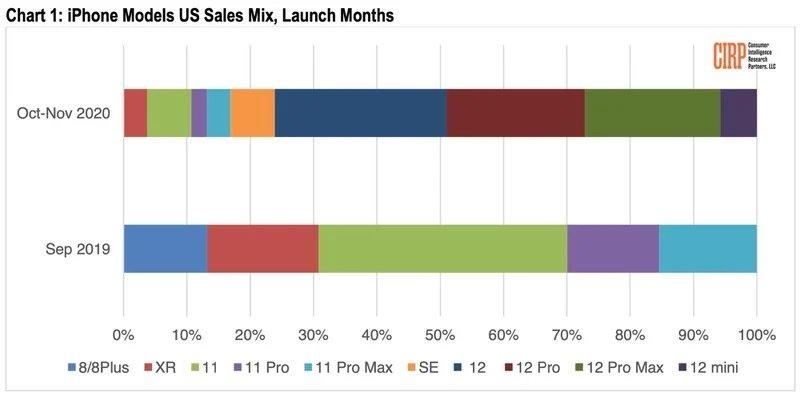

모든 모델이 골고루 잘 팔렸지만 그 중에서도 아이폰 12가 가장 잘팔렸다고 하네요. 바로 리뷰 수집에 들어가겠습니다.

In [25]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time


In [26]:
driver = webdriver.Chrome("./chromedriver")
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="ba6e45620b20a7b4005d5d539f920115")>

In [5]:
naver_url = 'https://search.shopping.naver.com/catalog/24452875523?cat_id=50001519&frm=NVSCPRO&query=%EC%95%84%EC%9D%B4%ED%8F%B0+12&NaPm=ct%3Dkq6njw54%7Cci%3D7b6a2e5b639c0675d0d121738aa4829401f7c989%7Ctr%3Dsls%7Csn%3D95694%7Chk%3D99f7361259d7e4d400c0c8025811189308e0595f'
driver.get(naver_url)

In [28]:
page = driver.page_source
soup = BeautifulSoup(page)

# 리뷰 리스트 묶인 거
r_all = soup.find("ul", class_="reviewItems_list_review__1sgcJ")

r_one = r_all.find_all("li")[0] # 리뷰 1개 index = (0,20)
score = r_one.find("span",class_="reviewItems_star__2EEY8").next_sibling

info = r_one.find_all("span", class_="reviewItems_etc__1YqVF")
store = info[0].text
usr_id = info[1].text
date = info[2].text
# print(store, usr_id, date)

rev = r_one.find("div", class_="reviewItems_review_text__2Bwpa")
title = rev.em.text
body = rev.p.text
# print(title, body)


In [27]:
naver_url = 'https://search.shopping.naver.com/catalog/24452875523?cat_id=50001519&frm=NVSCPRO&query=%EC%95%84%EC%9D%B4%ED%8F%B0+12&NaPm=ct%3Dkq6njw54%7Cci%3D7b6a2e5b639c0675d0d121738aa4829401f7c989%7Ctr%3Dsls%7Csn%3D95694%7Chk%3D99f7361259d7e4d400c0c8025811189308e0595f'
driver.get(naver_url)

score_all = [] # 평점
store_all = [] # 구매 스토어
id_all = [] # 작성자 ID
date_all = [] # 작성 일자
tit_all = [] # 리뷰 제목
body_all = [] # 리뷰 내용


i = 1
while True :
    
    time.sleep(3)
    page = driver.page_source
    soup = BeautifulSoup(page, "html.parser")
    
    # 리뷰 리스트 묶인 거
    r_all = soup.find("ul", class_="reviewItems_list_review__1sgcJ")
    
    for r_one in r_all :
        score = r_one.find("span",class_="reviewItems_star__2EEY8").next_sibling # 평점

        info = r_one.find_all("span", class_="reviewItems_etc__1YqVF")
        store = info[0].text # 구매 스토어
        usr_id = info[1].text # 작성자 ID
        date = info[2].text # 작성 일자
#         print(store, usr_id, date)

        rev = r_one.find("div", class_="reviewItems_review_text__2Bwpa")
        title = rev.em.text # 리뷰 제목
        body = rev.p.text # 리뷰 내용
#         print(title, body, "\n")

        score_all.append(score)
        store_all.append(store)
        id_all.append(usr_id)
        date_all.append(date)
        tit_all.append(title)
        body_all.append(body)
    
    print("%d 페이지 리뷰 크롤링 완료\n"%i)
    i += 1
    
    try :
        if i==11 : # 11
            sel_next = driver.find_element_by_xpath('//*[@id="section_review"]/div[3]/a[11]')
        elif (i%10==1)&(i!=1) : # 21, 31, 41 ...
            sel_next = driver.find_element_by_xpath('//*[@id="section_review"]/div[3]/a[12]')
        else :
            sel_next = driver.find_element_by_link_text(str(i))
        sel_next.click()
        
    except Exception :
        print(i)
        break


1 페이지 리뷰 크롤링 완료

2 페이지 리뷰 크롤링 완료

3 페이지 리뷰 크롤링 완료

4 페이지 리뷰 크롤링 완료

5 페이지 리뷰 크롤링 완료

6 페이지 리뷰 크롤링 완료

7 페이지 리뷰 크롤링 완료

8 페이지 리뷰 크롤링 완료

9 페이지 리뷰 크롤링 완료

10 페이지 리뷰 크롤링 완료

11 페이지 리뷰 크롤링 완료

12 페이지 리뷰 크롤링 완료

13 페이지 리뷰 크롤링 완료

14 페이지 리뷰 크롤링 완료

15 페이지 리뷰 크롤링 완료

16 페이지 리뷰 크롤링 완료

17 페이지 리뷰 크롤링 완료

18 페이지 리뷰 크롤링 완료

19 페이지 리뷰 크롤링 완료

20 페이지 리뷰 크롤링 완료

21 페이지 리뷰 크롤링 완료

22 페이지 리뷰 크롤링 완료

23 페이지 리뷰 크롤링 완료

24 페이지 리뷰 크롤링 완료

25 페이지 리뷰 크롤링 완료

26 페이지 리뷰 크롤링 완료

27 페이지 리뷰 크롤링 완료

28 페이지 리뷰 크롤링 완료

29 페이지 리뷰 크롤링 완료

30 페이지 리뷰 크롤링 완료

31 페이지 리뷰 크롤링 완료

32 페이지 리뷰 크롤링 완료

33 페이지 리뷰 크롤링 완료

34 페이지 리뷰 크롤링 완료

35 페이지 리뷰 크롤링 완료

36 페이지 리뷰 크롤링 완료

37 페이지 리뷰 크롤링 완료

38 페이지 리뷰 크롤링 완료

39 페이지 리뷰 크롤링 완료

40 페이지 리뷰 크롤링 완료

41 페이지 리뷰 크롤링 완료

42 페이지 리뷰 크롤링 완료

43 페이지 리뷰 크롤링 완료

44 페이지 리뷰 크롤링 완료

45 페이지 리뷰 크롤링 완료

46 페이지 리뷰 크롤링 완료

47 페이지 리뷰 크롤링 완료

48 페이지 리뷰 크롤링 완료

49 페이지 리뷰 크롤링 완료

50 페이지 리뷰 크롤링 완료

51 페이지 리뷰 크롤링 완료

52 페이지 리뷰 크롤링 완료

53 페이지 리뷰 크롤링 완료

54 페이지 리뷰 크롤링 완료

55 페이지 리뷰 크롤링 완료

56 페이지 리뷰 크롤링 완료

5

In [ ]:
dat = {"user_id":id_all,"score" :score_all, "date":date_all, "store":store_all, 
      "review_title":tit_all, "review_contents" : body_all}
dat = pd.DataFrame(dat)
dat.to_csv("iPhone_12.csv")

### 시각화  wordcloud

In [7]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='NanumGothic')

In [22]:
dat = pd.read_csv("iPhone_12.csv")
review = dat["review_contents"]

text = ""
for i in range(len(review)):
    text += review[i]
    
sw_list = ["너무", "잘", "아이폰","배송","아주","빠르고","좋아요","배송도"
          "배송은","만족합니다","감사합니다","받았습니다","정말","바로"]

(-0.5, 399.5, 199.5, -0.5)

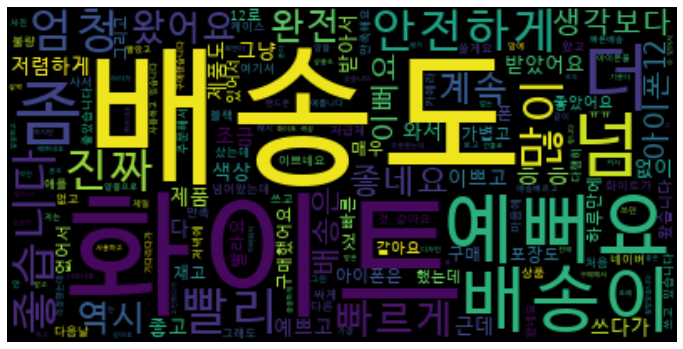

In [23]:
%matplotlib inline
wcloud = WordCloud('../class10_0617/data/D2Coding.ttf',stopwords=sw_list, max_words=1000, relative_scaling=0.2).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

#### 2021.06.21 project day+1

생각보다 제품에 대한 구체적인 장/단점을 들을 수는 없었다. 대부분 배송에 관한 이야기였으며 특징지을만한 키워드들은 없었다... 아쉽다. 어떻게 진전시켜 나가야할까. 앞서 한계로 지목한대로 시각화로 하다보니 정량적인 측정이 불가능하다. 